
# --------------------------------------------------------
# A simple documentation for RIXS DataAnalysis
# --------------------------------------------------------
Juanjuan Huang (Cathy)<br>
<a href="http://www.juanjuan-huang.com/">juanjuan-huang.com</a><br>
19-04-2017 created<br>
06-07-2017 updated<br>
Version 0.1

# <font color="7d020c">Class DataAnalysis(object)</font>
   <p style="font-size:15px">This includes:</p>
   <p style="font-size:15px"><b> (I)  XANES data processing </b></p> 
   <br>
   &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;
   1.1 Averaged/summed XANES plotting with interpolation for incident energy<br>
   
   &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;
   1.2 XANES area normalization (normalized to whole area or specified tail region<br>
   
   &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;
   1.3 XANES area integration calculation<br> 
   
   &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;
   1.4 Find peaks(maxima) in XANES<br>
   
   &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;
   1.5 Radiation damage XANES test<br>   
   
   <p style="font-size:15px"><b> (II) RIXS data processing</b><br></p>
   <p style="font-size:15px"> &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;
                              2.1 2D/3D RIXS plane plotting with interpolation for both incident energy and emission energy<br></p>
   <br>
   &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;
   2.1.1 concentration correction<br>
   &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;
   2.1.2 IE versus EE plotting <br>
   &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;
   2.1.3 IE versus ET plotting  <br>
   &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;
   2.1.4 RIXS plane CIE CEE CET cuts and integration plotting <br>

   <p style="font-size:15px"> &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;
                              2.2 Averaging and merging for RIXS planes energy<br></p>
   
   <p style="font-size:15px"><b> (III) Save the data into RIXS txt files so that can be further used by other software, e.g, Matlab </b></p> 
   <br>


  ### ==== Methods ====
  <p style="font-size:15px"><b> ------ XANES PART ------ </b></p> 
  
  <br><b>XANES_data( ):</b> 
                       <br> To get XANES merged data ndarray from SPEC file
                       <br> ------ <>return [incident energy, intensity], dtype = 1d ndarray
                        
  <b>Radiation_damage( ):</b> 
                       <br> Averaging for a step of XANES
                       <br> ------ return [incident energy, intensity], dtype = 1d ndarray
              
  <b>XANES_normalize( ):</b> 
                       <br> Normalize XANES to area into unity(whole area or specified tail area)
                       <br> ------ return [incident energy, normalized_intensity], dtype = 1d ndarray

  <b>XANES_find_peaks( ):</b> 
                       <br> Find XANES peaks and plotting </br>
                       <br> ------ return [peak energy, peak_intensity], dtype = 1d ndarray
  
  <b>XANES_area( ):</b> 
                       <br> calculate XANES area for specified energy range
                       <br> ------ return area, dtype = float <br></p>


  ### ==== Methods ====
  <p style="font-size:15px"><b> ------ RIXS PART ------ </b></p>
  
  <b>RIXS_data( ):</b> 
                       <br> To get RIXS data ndarray from SPEC file</br>
                       <br> ------ return data ndarray [incident energy, emission energy, intensity] 
                        
  <b>RIXS_merge( ):</b> 
                       <br> To merge (sum up/average different RIXS data ndarray) 
                       <br> ------ return data ndarray [incident energy, emission energy, intensity] 
              
  <b>RIXS_display( ):</b> 
                       <br> To plot RIXS planes
                       <br> ------ return None

  <b>RIXS_cut( ):</b> 
                       <br> To do CIE, CET, CEE cuts 
                       <br> ------ return CIE, CET, CEE data ndarray [incident energy/energy transfer, intensity]
  
  <b>RIXS_integration( ):</b> 
                       <br> Integration along incident energy and energy transfer
                       <br> ------ return integrated data ndarray [incident energy/energy transfer, intensity]

  ### ==== Functions ====

  ###  ==== Parameters ==== 
  path : the filepath of Specfile

### <font color="7d020c">Example</font>   |   Initialization

In [1]:
from DataAnalysis import DataAnalysis
import matplotlib.pyplot as plt

In [2]:
mycompound = DataAnalysis('../../04_30170320_Experiments/00_Compounds_SPECfile/Compound_7')

-------------------------------
## <font color="brown"> I. XANES PART </font>
### <font color="890553"> 1. XANES_data()</font>

To get XANES merged data ndarray from SPEC file
The incident energy for scans can be different

### Parameters
<b>firstScan</b> : 
            the index of first scan, e.g, 71 corresponding to fscan '72.1'<br>
<b>lastScan</b> : 
            the index of first scan<br>
<b>skipScan</b> : 
            the problematic scans that you want to skip, <br> 
            &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; 
            &nbsp;&nbsp; &nbsp;
            e.g, [2,5,8] -- skip '3.1','6.1','9.1' scans <br>
            
<b>interp_npt_1eV</b> : 
            the number of interpolation points for 1 eV,<br> 
            &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; 
            &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; 
            default: 20 points for 1 eV<br>
            &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; 
            &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
            e.g, Incident Energy: 6535 eV - 6545 eV, 11 eV,115 points, -----> 220 points
            
<b>method</b> : 
            'average' or 'sum' for intensity<br>
<b>channel</b>: 
            'det_dtc' for HERFD-XAS, 'IF2' for conventional XAS<br>
            
### Returns
<b>out</b> :&nbsp; &nbsp;&nbsp;
            A 1d data ndarray [incident_Energy_interp, XANES_merge_inten]<br>
            &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;
            incident_Energy_interp -----> interpolated incident energy<br>
            &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;
            XANES_merge_inten -----> interpolated intensity<br>

### <font color="7d020c">Example</font>   |   XANES_data()

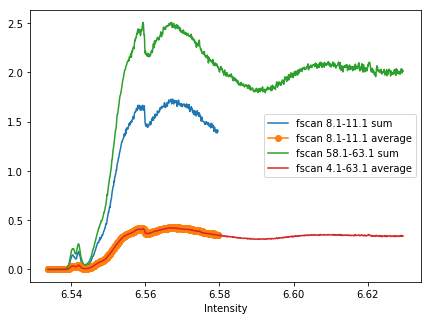

In [3]:
myXANES1 = mycompound.XANES_data(7,10, method = 'sum')
# We can skip problematic scans by define skipScan=[11] --- > skip scan 11
myXANES2 = mycompound.XANES_data(7,10, skipScan=[11], method = 'average')
myXANES3 = mycompound.XANES_data(57,62, method = 'sum')
myXANES4 = mycompound.XANES_data(3,62, method = 'average')

fig = plt.figure(1, figsize=(7,5))
plt.plot(myXANES1[0],myXANES1[1],
         myXANES2[0],myXANES2[1],'-o',
         myXANES3[0],myXANES3[1],
         myXANES4[0],myXANES4[1])

plt.legend(['fscan 8.1-11.1 sum',
            'fscan 8.1-11.1 average',
            'fscan 58.1-63.1 sum',
            'fscan 4.1-63.1 average'])
plt.xlabel('Incident Energy [eV]')
plt.xlabel('Intensity')
plt.show()

### <font color="890553"> 2. Radiation damage()</font>

To get XANES merged data ndarray for Radiation damage test
The incident energy for scans can be different

### Parameters
<b>firstScan</b> : 
            the index of first scan, e.g, 71 corresponding to fscan '72.1'<br>
<b>lastScan</b> : 
            the index of first scan<br>
<b>scanStep</b> : 
            the step for radiation damage<br>
<b>skipScan</b> : 
            the problematic scans that you want to skip, <br> 
            &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; 
            &nbsp;&nbsp; &nbsp;
            e.g, [2,5,8] -- skip '3.1','6.1','9.1' scans <br>
            
<b>interp_npt_1eV</b> : 
            the number of interpolation points for 1 eV,<br> 
            &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; 
            &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; 
            default: 20 points for 1 eV<br>
            &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; 
            &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
            e.g, Incident Energy: 6535 eV - 6545 eV, 11 eV,115 points, -----> 220 points
            
<b>method</b> : 
            'average' or 'sum' for intensity<br>
<b>channel</b>: 
            'det_dtc' for HERFD-XAS, 'IF2' for conventional XAS<br>
            
### Returns
<b>out</b> :&nbsp; &nbsp;&nbsp;
            A 1d data ndarray [incident_Energy_interp, XANES_merge_inten]<br>
            &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;
            incident_Energy_interp -----> interpolated incident energy<br>
            &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;
            XANES_merge_inten -----> interpolated intensity<br>

### <font color="7d020c">Example</font>   |   Radiation_damage( )

adding the41 scan
adding the46 scan
adding the51 scan
adding the56 scan
adding the61 scan
adding the66 scan
adding the42 scan
adding the47 scan
adding the52 scan
adding the57 scan
adding the62 scan
adding the67 scan
adding the43 scan
adding the48 scan
adding the53 scan
adding the58 scan
adding the63 scan
adding the68 scan
adding the44 scan
adding the49 scan
adding the54 scan
adding the59 scan
adding the64 scan
adding the69 scan
adding the45 scan
adding the50 scan
adding the55 scan
adding the60 scan
adding the65 scan
adding the70 scan


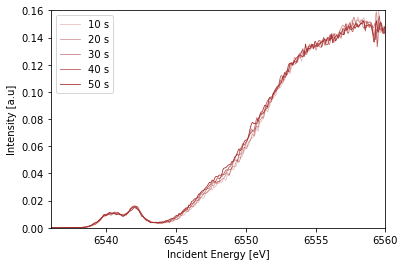

In [4]:
# initialize
compound7 = DataAnalysis('../../05_20170527_Experiment/00_SPECfile/Compound_7')
# the fist radiation scan
n= 41
compound7_radiation_damage_10 = compound7.Radiation_damage(n,70,5)   # radiation after 10 s
compound7_radiation_damage_20 = compound7.Radiation_damage(n+1,70,5) # radiation after 20 s
compound7_radiation_damage_30 = compound7.Radiation_damage(n+2,70,5) # radiation after 30 s
compound7_radiation_damage_40 = compound7.Radiation_damage(n+3,70,5) # radiation after 40 s
compound7_radiation_damage_50 = compound7.Radiation_damage(n+4,70,5) # radiation after 50 s
plt.plot(compound7_radiation_damage_10[0]*1000, compound7_radiation_damage_10[1], 'brown',label = '10 s',alpha = 0.3,linewidth = 0.8)
plt.plot(compound7_radiation_damage_20[0]*1000, compound7_radiation_damage_20[1], 'brown',label = '20 s',alpha = 0.5,linewidth = 0.8)
plt.plot(compound7_radiation_damage_30[0]*1000, compound7_radiation_damage_30[1], 'brown',label = '30 s',alpha = 0.6,linewidth = 0.8)
plt.plot(compound7_radiation_damage_40[0]*1000, compound7_radiation_damage_40[1], 'brown',label = '40 s',alpha = 0.8,linewidth = 0.8)
plt.plot(compound7_radiation_damage_50[0]*1000, compound7_radiation_damage_50[1], 'brown',label = '50 s',alpha = 1,linewidth = 0.8)

plt.xlim(6536,6560)
plt.ylim(0,0.16)
plt.legend()
plt.xlabel('Incident Energy [eV]')
plt.ylabel('Intensity [a.u]')
plt.show()

### <font color="890553"> 3. XANES_normalize()</font>

Normalize XANES to area into unity(whole area or specified tail area)

### Parameters
<b>XANES_data</b> : 
            the XANES_data output ndarray<br>
<b>normalize_energy_range</b> : 
            (normalized_starting_energy, normalized_ending_energy) <br> 
            &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; 
            &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; 
            &nbsp;&nbsp; &nbsp; &nbsp;&nbsp;  &nbsp;&nbsp;  &nbsp;&nbsp; 
            e.g, Incident Energy: (6600, 6800) -----> will do normalization from 6600 eV to 6800eV <br>
            &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; 
            &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; 
            &nbsp;&nbsp; &nbsp; &nbsp;&nbsp;  &nbsp;&nbsp;  &nbsp;&nbsp; 
            Not defined-----> Normalization to the whole area <br>
### Returns
<b>out</b> :&nbsp; &nbsp;&nbsp;
            A data ndarray [energy, normlized_intensity]<br>

### <font color="7d020c">Example</font>   |   XANES_normalize( )

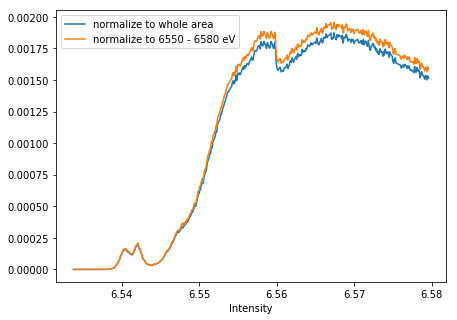

In [5]:
myXANES1_normalize = mycompound.XANES_normalize(myXANES1) # the whole area = 1
myXANES2_normalize = mycompound.XANES_normalize(myXANES2, normalize_energy_range=(6550,6580)) # 6550-6580 area = 1

fig = plt.figure(1, figsize=(7,5))
plt.plot(myXANES1_normalize[0],myXANES1_normalize[1],
         myXANES2_normalize[0],myXANES2_normalize[1],
        )
plt.legend(['normalize to whole area',
            'normalize to 6550 - 6580 eV']
          )
plt.xlabel('Incident Energy [eV]')
plt.xlabel('Intensity')
plt.show()

### <font color="890553"> 4. XANES_find_peaks()</font>

Find XANES peaks

### Parameters
<b>XANES_data</b> : 
            the XANES_data or XANES_normalize output ndarray<br>
<b>energy_range</b> : 
            An energy number, e.g, Incident Energy: 6600 eV, <br> 
            &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; 
            &nbsp;&nbsp; &nbsp;
            -----> will do normalization from 6600 eV to the end of tail feature <br>
            &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; 
            &nbsp;&nbsp; &nbsp;
            -----> Not define-----> Normalization to the whole area <br>
<b>accuracy</b> : 
            the same with scipy.signal.find_peaks<br>
             
### Returns
<b>out</b> :
            A data ndarray of the maxima [peak_energy, peak_intensity]

### <font color="7d020c">Example</font>   |   XANES_find_peaks( )

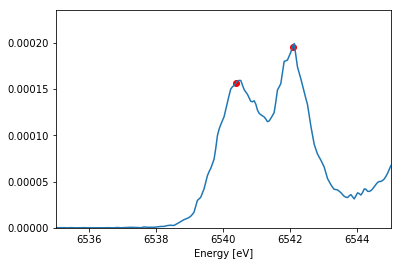

array([[  6.54037845e+00,   6.54207291e+00],
       [  1.56192670e-04,   1.95848760e-04]])

In [6]:
mycompound.XANES_find_peaks(myXANES1_normalize, energy_range=(6535,6545),accuracy=(5,20))

### <font color="890553"> 5. XANES_area( )</font>

Calculate XANES area

### Parameters
<b>XANES_data</b> : 
            the XANES_data or XANES_normalize output ndarray<br>
<b>energy_range</b> : 
            (e1, e2) <br> 
            &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; 
            &nbsp;&nbsp; &nbsp;
            e1: The starting energy for calculating the area, in eV <br>
            &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; 
            &nbsp;&nbsp; &nbsp;
            e2: The ending energy for calculating the area, in eV <br>
             
### Returns
<b>out</b> :
            XANES_area, dtype = float

### <font color="7d020c">Example</font>   |   XANES_area(  )

In [7]:
mycompound.XANES_area(myXANES1_normalize,energy_range=(6538,6544))

The edge area from 6538 eV to 6544 eV is :0.0103943603893


0.010394360389270454

-------------------------------
## <font color="brown"> II. RIXS PART </font>
### <font color="890553"> 1. RIXS_data()</font>

RIXS_data(self,firstScan, lastScan, concCorrecScan, interp_npt_1eV = 20, choice = 'EE', savetxt = False)

To get RIXS data ndarray from SPEC file

### Parameters
<b>firstScan</b> : the index of first scan, e.g, 71 corresponding to fscan '72.1'<br>
<b>lastScan</b> : the index of first scan<br>
<b>concCorrecScan</b> : the index of concentration correction scan, normally the one after last RIXS scan,<br>
                        &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; 
                        &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
                        if skip the value, automatically don't do concentration correction<br>
<b>interp_npt_1eV</b> : the number of interpolation points for 1 eV, default: 20 points for 1 eV<br>
                 &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; 
                 &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
                 e.g, Incident Energy: 6535 eV - 6545 eV, 11 eV, 115 points, -----> 220 points<br>
                 &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; 
                 &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
                 Emitted  Energy: 5890 eV - 5905 eV, 15 eV, 76  points, -----> 300 points<br>
<b>choice</b> : 'EE': get -----> incident energy & emission energy plotting<br>
         &nbsp;&nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp;'ET': get -----> energy transfer & emission energy plotting<br>
<b>savetxt</b>: default True, save the ET, EE data as folders <br>

### Returns
if choice = 'EE'<br>
<b>out</b> : ndarray, A data list [EE_XX, EE_YY, EE_MDfci_correc_inten_2dinterp]<br>
      EE_XX -----> interpolated incident energy ndarray<br>
      EE_YY -----> interpolated emission energy ndarray<br>
      EE_MDfci_correc_inten_2dinterp -----> interpolated intensity ndarray<br>

if choice = 'ET'<br>
<b>out</b> : ndarray, A data list [ET_XX, ET_YY, ET_MDfci_correc_inten_2dinterp]<br>
      ET_XX -----> interpolated incident energy ndarray<br>
      ET_YY -----> interpolated energy transfer ndarray<br>
      ET_MDfci_correc_inten_2dinterp -----> interpolated intensity ndarray

### <font color="890553"> 2. RIXS_display( ) & RIXS_imshow( ) </font> 

To plot RIXS planes<br>
RIXS_imshow( ) written by Marius Retegan

### Parameters
<b>dataArray</b> : the return ndarray [XX, YY, intensity] from RIXS_data<br>
<b>title</b> :  plotting title, str<br>
<b>x_lim</b> : set limit for x axis, e.g, (6537,6544) stands for energy range from 6537-6544 eV<br>
<b>y_lim</b> : set limit for y axis, e.g, (5892,5902)<br>
<b>choice</b> : 'EE': get -----> incident energy & emission energy plotting<br>
         &nbsp;&nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp;'ET': get -----> energy transfer & emission energy plotting<br>
<b>mode</b>: '2d' 2d plotting(default), '3d' 3d plotting <br>
<b>normalize_to_Preedge</b> : set pre-edge maximum as the max color(vmax),<br>
                 &nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; 
                 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; 
                 default = False: automatically choose the max of the whole peak max as vmax<br>
         
### Returns
if choice = 'EE'<br>
<b>out</b> : ndarray<br>
             Array of zeros with the given shape, dtype, and order.<br>

### <font color="7d020c">Example</font>   |   RIXS_data( ) & RIXS_display

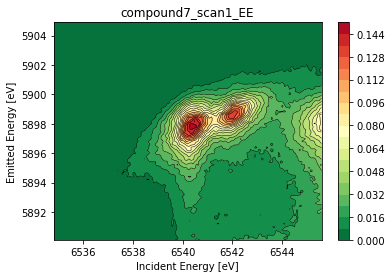

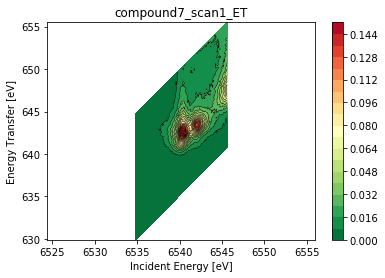

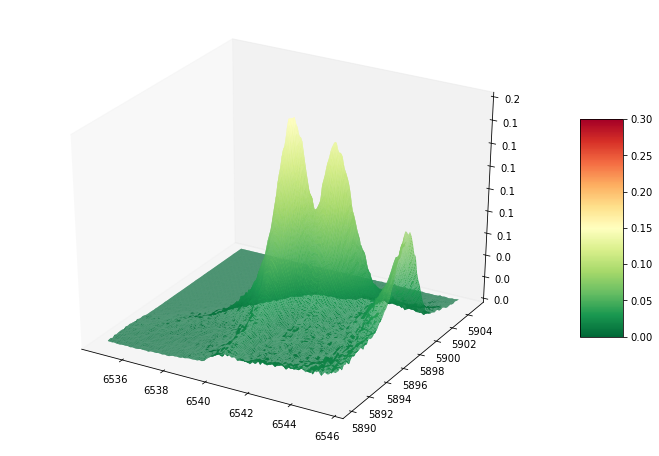

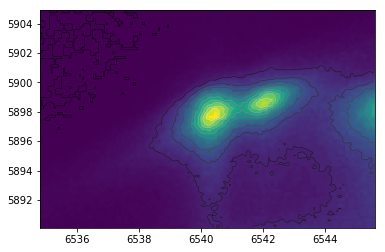

In [8]:
# Scan 1
# first use RIXS_data() to creat RIXS nd array matrixes
mycompound_EE_scan1 = mycompound.RIXS_data(71, 146, 147, choice = 'EE');
mycompound_ET_scan1 = mycompound.RIXS_data(71, 146, 147, choice = 'ET');
# Then put the output RIXS ndarray into RIXS_display method
mycompound.RIXS_display(mycompound_EE_scan1, title = 'compound7_scan1_EE')
mycompound.RIXS_display(mycompound_ET_scan1, choice='ET', title = 'compound7_scan1_ET')

# Scan 2
mycompound_EE_scan2 = mycompound.RIXS_data(151, 226, 227, choice = 'EE');
mycompound_ET_scan2 = mycompound.RIXS_data(151, 226, 227, choice = 'ET');
mycompound.RIXS_display(mycompound_EE_scan2, title = 'compound7_scan2_EE',mode='3d')

# Or use imshow() method
mycompound.RIXS_imshow(mycompound_EE_scan2)

-------------------------------
## <font color="890553"> 3. RIXS_merge ()</font>

To merge (sum up/average different RIXS data ndarray)

### Parameters
<b>scansets</b> : put all the RIXS_data output file that want to mergy into a list<br>
           e.g. [dataArray1, dataArray2, dataArray3]<br>
<b>choice</b> : 'sum':     get -----> summed intensity<br>
         'average': get -----> averaged intensity<br>

### Returns
if choice = 'sum':<br>
<b>out</b> : A new ndarray dataArray with summed intensity<br> 
      -----> [averaged_XX,averaged_YY,summed_intensity]<br>

if choice = 'average':<br>
<b>out</b> : A new ndarray dataArray with summed intensity<br>
      -----> [averaged_XX,averaged_YY,averaged_intensity]<br>

### <font color="7d020c">Example</font>   |   RIXS_merge()

In [9]:
my_merged_RIXS_EE = mycompound.RIXS_merge([mycompound_EE_scan1, mycompound_EE_scan2])
my_merged_RIXS_ET = mycompound.RIXS_merge([mycompound_ET_scan1, mycompound_ET_scan2])

-------------------------------
## <font color="890553"> 4. RIXS_normalization( )</font>

RIXS plane normalized to pre-edges (one needs to define pre-edge incident energy range)

### Parameters
<b>RIXS_data</b> : the RIXS_data [XX, YY, intensity]<br>
<b>XX_range</b> : A tuple of pre-edge range, e.g, XX_range =  (6538,6542)<br>
                  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
                  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp;
                  Default if the range not defined <br>
                  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp;&nbsp;
                  &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; &nbsp;
                  -----> Normalization to the whole area <br>
<b>plot</b>: default False, plot the normalized RIXS plane [SUGGESTED] <br>
<b>levelnumber</b>: default 20, the contour levels used for plotting <br>
<b>xlim</b>: same like in matplotlib, e.g. xlim = (6537.3, 6544.8) <br>
<b>ylim</b>: same like in matplotlib, e.g. xlim = (638.5, 647)     <br>
<b>savefig</b>: Default = False, save the plotted RIXS plane<br>


### Returns

<b>out</b> : A data ndarray of the normalized RIXS data [RIXS_XX, RIXS_YY, RIXS_intensity]


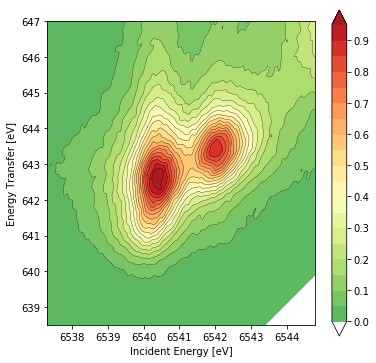

In [10]:
mycompound.RIXS_normalization(my_merged_RIXS_ET, XX_range = (6538,6542), plot=True, 
                              xlim = (6537.3, 6544.8), ylim = (638.5, 647));

--------------------------
## <font color="890553"> 5. RIXS_cut()</font>

To do CIE, CET, CEE cuts(choice, cut)<br>
NOTICE: Choose ET dataArray for CIE & CET<br>
        Choose EE dataArray for CEE<br>

### Parameters
<b>dataArray</b>: the RIXS_data output file<br>
<b>choice</b>: 'CIE'-- Constant incident energy cut<br>
        'CET'-- Constant energy transfer cut<br>
        'CEE'-- Constant emission energy cut<br>
<b>cut</b>: the energy (eV) you want to cut, e.g., 6530 eV<br>

### Returns
<b>out</b> : 
ndarray<br>
CIE, CET, CEE data ndarray [incident energy/energy transfer, intensity]

### <font color="7d020c">Example</font>   |    RIXS_cut()

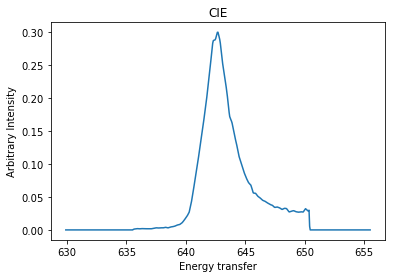

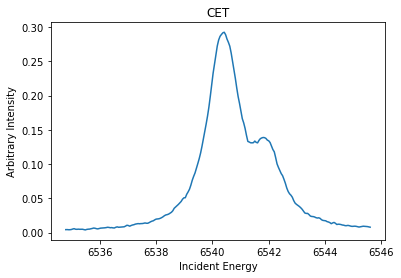

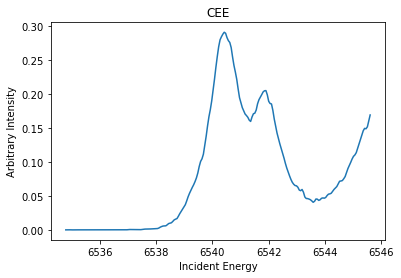

In [11]:
mycompound.RIXS_cut(my_merged_RIXS_ET,'CIE',6540.48);
mycompound.RIXS_cut(my_merged_RIXS_ET,'CET',642.45);
mycompound.RIXS_cut(my_merged_RIXS_EE,'CEE',5898);

--------------------------
## <font color="890553"> VI.RIXS_integration()</font>

Integration along incident energy and energy transfer

Parameters
----------
<b>dataArray</b>: the RIXS_data return data ndarray

Returns
-------
<b>out</b> :     
ndarray<br>
integrated data ndarray [incident energy/energy transfer, intensity]

### <font color="7d020c">Example</font>   |    RIXS_integration()

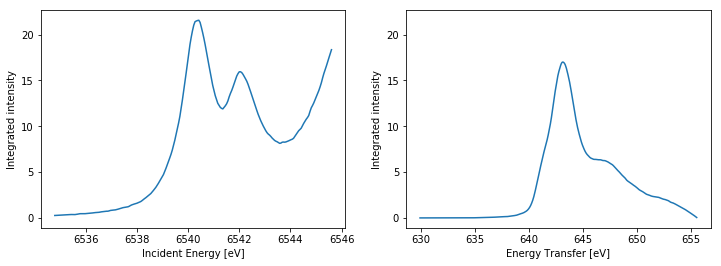

In [12]:
mycompound.RIXS_integration(my_merged_RIXS_ET);